# Machine Learning Coursework

## Predicting the Existence of the Higgs Boson

### Introduction

This notebook will include the data preprocessing for the Machine Learning Coursework. The dataset was obtained from the Higgs Boson Machine Learning Challenge on Kaggle. The aim of the challenge is to distinguish the Higgs signal from background signals.

<b>Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Importing data</b>

In [2]:
# Missing values are given by -999
data = pd.read_csv("training.csv", na_values=[-999])

In [3]:
data.shape

(250000, 33)

In [4]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


### Exploratory Data Analysis

<b>Target Variable Analysis</b>

The target variable in this dataset is aptly named "Label". It is a categorical variable, taking on the values "s" and "b" corresponding to the Higgs signal and background signals respectively. To make it compatible with constructed machine learning models, this variable will need to be encoded.

In [5]:
data["Label"] = data["Label"].apply(lambda x: 1 if x == "s" else 0)

In [6]:
data["Label"].value_counts()/data.shape[0]

0    0.657332
1    0.342668
Name: Label, dtype: float64

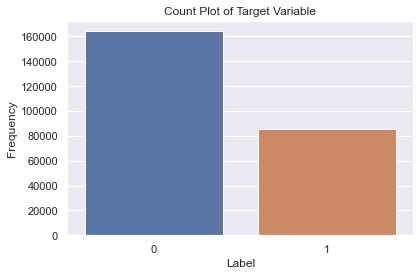

In [7]:
sns.set_theme()
sns.countplot(data = data, x = "Label")
plt.title("Count Plot of Target Variable")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Results above indicate a slight class imbalance in the target variable. This will need to be considered when building and evaluating machine learning models.

<b>Analysis of Feature Variables</b>

Investigation of the data source shows that variables starting with "DER" have been derived from primitive variables - variables starting with "PRI". These derived variables are then used to calculate presence of the Higgs signal. Therefore, primitive variables can be dropped from the dataset.

In [8]:
cols = data.columns.tolist()

In [9]:
prim_features = []

for col in cols:
    
    if "PRI" in col:
        
        prim_features.append(col)

In [10]:
prim_features

['PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

In [11]:
data1 = data.drop(prim_features, axis = 1)

<b>Missing Value Treatment</b>

Missing values will be treated as follows:

* Columns with more than 70% missing values will be dropped
* Remaining missing values will be imputed with column medians

In [12]:
data1.isnull().sum()/data1.shape[0]

EventId                        0.000000
DER_mass_MMC                   0.152456
DER_mass_transverse_met_lep    0.000000
DER_mass_vis                   0.000000
DER_pt_h                       0.000000
DER_deltaeta_jet_jet           0.709828
DER_mass_jet_jet               0.709828
DER_prodeta_jet_jet            0.709828
DER_deltar_tau_lep             0.000000
DER_pt_tot                     0.000000
DER_sum_pt                     0.000000
DER_pt_ratio_lep_tau           0.000000
DER_met_phi_centrality         0.000000
DER_lep_eta_centrality         0.709828
Weight                         0.000000
Label                          0.000000
dtype: float64

In [13]:
# Dropping variables with more than 70% missing values
threshold = data1.shape[0] * 0.3
data1 = data1.dropna(thresh = threshold, axis = 1)

In [14]:
# Imputing DER_mass_MMC with median
col_median = data["DER_mass_MMC"].median()

data1["DER_mass_MMC"].fillna(col_median, inplace = True)

In [15]:
data1.isnull().sum()/data1.shape[0]

EventId                        0.0
DER_mass_MMC                   0.0
DER_mass_transverse_met_lep    0.0
DER_mass_vis                   0.0
DER_pt_h                       0.0
DER_deltar_tau_lep             0.0
DER_pt_tot                     0.0
DER_sum_pt                     0.0
DER_pt_ratio_lep_tau           0.0
DER_met_phi_centrality         0.0
Weight                         0.0
Label                          0.0
dtype: float64

<b>EventId</b>

This variable will be dropped.

In [16]:
data1.drop("EventId", axis = 1, inplace = True)

<b>DER_mass_MMC</b>

In [17]:
# Statistical summary
data1["DER_mass_MMC"].describe()

count    250000.000000
mean        120.417434
std          52.859218
min           9.044000
25%          95.665000
50%         112.406000
75%         130.606250
max        1192.026000
Name: DER_mass_MMC, dtype: float64

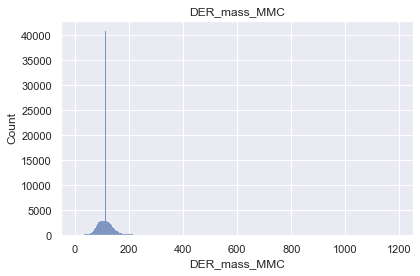

In [18]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_mass_MMC")
plt.title("DER_mass_MMC")
plt.xlabel("DER_mass_MMC")
plt.tight_layout()
plt.show()

<b>DER_mass_transverse_met_lep</b>

In [19]:
# Statistical summary
data1["DER_mass_transverse_met_lep"].describe()

count    250000.000000
mean         49.239819
std          35.344886
min           0.000000
25%          19.241000
50%          46.524000
75%          73.598000
max         690.075000
Name: DER_mass_transverse_met_lep, dtype: float64

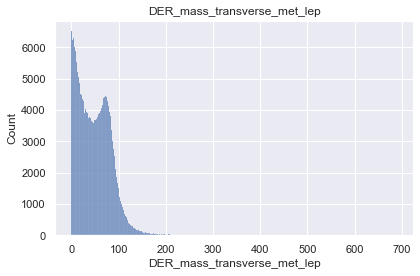

In [20]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_mass_transverse_met_lep")
plt.title("DER_mass_transverse_met_lep")
plt.xlabel("DER_mass_transverse_met_lep")
plt.tight_layout()
plt.show()

<b>DER_mass_vis</b>

In [21]:
# Statistical summary
data1["DER_mass_vis"].describe()

count    250000.000000
mean         81.181982
std          40.828691
min           6.329000
25%          59.388750
50%          73.752000
75%          92.259000
max        1349.351000
Name: DER_mass_vis, dtype: float64

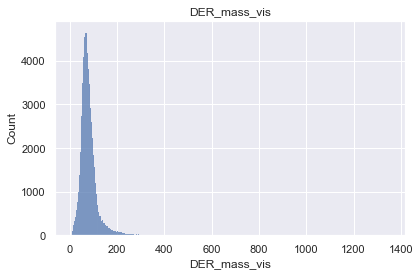

In [22]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_mass_vis")
plt.title("DER_mass_vis")
plt.xlabel("DER_mass_vis")
plt.tight_layout()
plt.show()

<b>DER_pt_h</b>

In [23]:
# Statistical summary
data1["DER_pt_h"].describe()

count    250000.000000
mean         57.895962
std          63.655682
min           0.000000
25%          14.068750
50%          38.467500
75%          79.169000
max        2834.999000
Name: DER_pt_h, dtype: float64

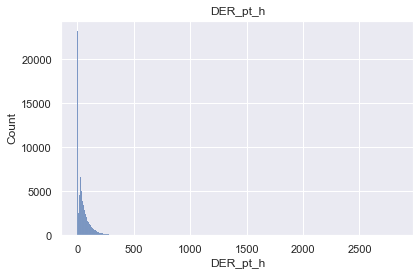

In [24]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_pt_h")
plt.title("DER_pt_h")
plt.xlabel("DER_pt_h")
plt.tight_layout()
plt.show()

<b>DER_deltar_tau_lep</b>

In [25]:
# Statistical summary
data1["DER_deltar_tau_lep"].describe()

count    250000.000000
mean          2.373100
std           0.782911
min           0.208000
25%           1.810000
50%           2.491500
75%           2.961000
max           5.684000
Name: DER_deltar_tau_lep, dtype: float64

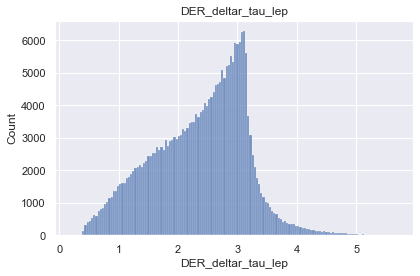

In [26]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_deltar_tau_lep")
plt.title("DER_deltar_tau_lep")
plt.xlabel("DER_deltar_tau_lep")
plt.tight_layout()
plt.show()

<b>DER_pt_tot</b>

In [27]:
# Statistical summary
data1["DER_pt_tot"].describe()

count    250000.000000
mean         18.917332
std          22.273494
min           0.000000
25%           2.841000
50%          12.315500
75%          27.591000
max        2834.999000
Name: DER_pt_tot, dtype: float64

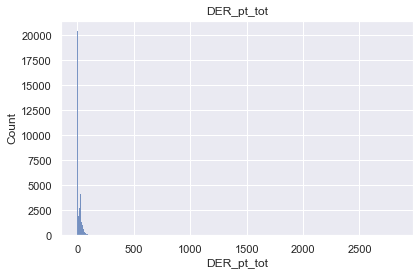

In [28]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_pt_tot")
plt.title("DER_pt_tot")
plt.xlabel("DER_pt_tot")
plt.tight_layout()
plt.show()

<b>DER_sum_pt</b>

In [29]:
# Statistical summary
data1["DER_sum_pt"].describe()

count    250000.000000
mean        158.432217
std         115.706115
min          46.104000
25%          77.550000
50%         120.664500
75%         200.478250
max        1852.462000
Name: DER_sum_pt, dtype: float64

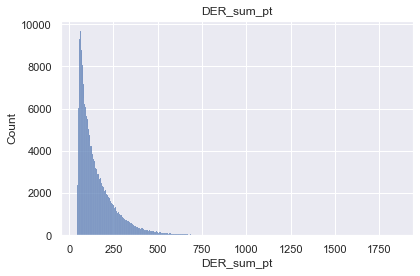

In [30]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_sum_pt")
plt.title("DER_sum_pt")
plt.xlabel("DER_sum_pt")
plt.tight_layout()
plt.show()

<b>DER_pt_ratio_lep_tau</b>

In [31]:
# Statistical summary
data1["DER_pt_ratio_lep_tau"].describe()

count    250000.000000
mean          1.437609
std           0.844743
min           0.047000
25%           0.883000
50%           1.280000
75%           1.777000
max          19.773000
Name: DER_pt_ratio_lep_tau, dtype: float64

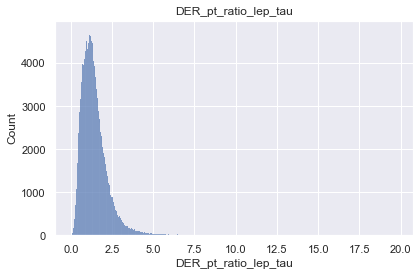

In [32]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_pt_ratio_lep_tau")
plt.title("DER_pt_ratio_lep_tau")
plt.xlabel("DER_pt_ratio_lep_tau")
plt.tight_layout()
plt.show()

<b>DER_met_phi_centrality</b>

In [33]:
# Statistical summary
data1["DER_met_phi_centrality"].describe()

count    250000.000000
mean         -0.128305
std           1.193585
min          -1.414000
25%          -1.371000
50%          -0.356000
75%           1.225000
max           1.414000
Name: DER_met_phi_centrality, dtype: float64

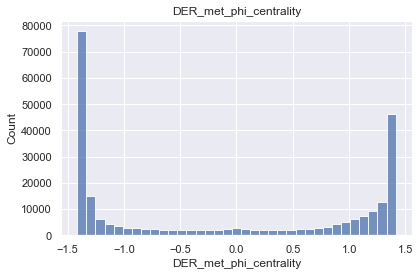

In [34]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "DER_met_phi_centrality")
plt.title("DER_met_phi_centrality")
plt.xlabel("DER_met_phi_centrality")
plt.tight_layout()
plt.show()

<b>Weight</b>

In [35]:
# Statistical summary
data1["Weight"].describe()

count    250000.000000
mean          1.646767
std           1.875103
min           0.001502
25%           0.018636
50%           1.156188
75%           2.404128
max           7.822543
Name: Weight, dtype: float64

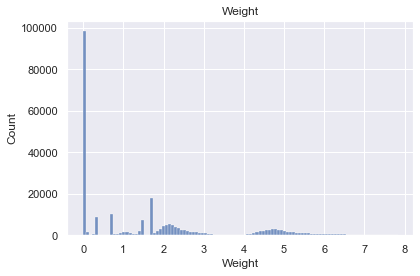

In [36]:
# Histogram
sns.set_theme()
sns.histplot(data = data1, x = "Weight")
plt.title("Weight")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

Investigation of the data source shows multiple errors with this variable. It will be dropped.

In [37]:
data1.drop("Weight", axis = 1, inplace = True)

<b>Exploring Correlation between Features</b>

In [38]:
feat = data1.drop("Label", axis = 1)

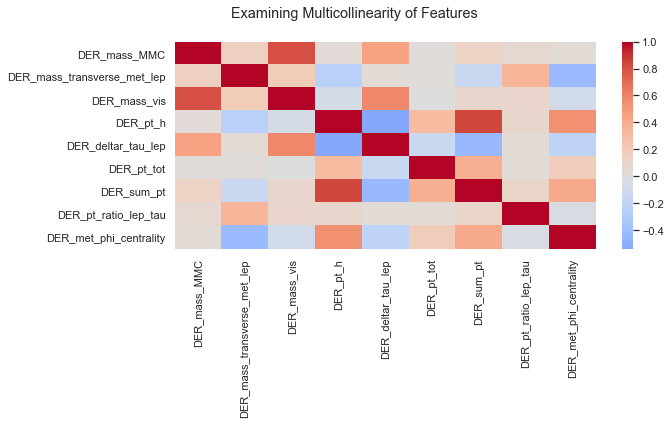

In [39]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(feat.corr(), center = 0, cmap = "coolwarm")
plt.suptitle("Examining Multicollinearity of Features")
plt.tight_layout()
plt.show()

Other than one or two variables, there is no evidence of high collinearity between the features. 

In [40]:
data1.shape

(250000, 10)

## Sampling Data

Instead of training and evaluating models on all 250,000 observations, a smaller sample will be obtained by randomly sampling the dataset. It is important when doing this that the underlying distributions of the data stays the same.

In [41]:
# Randomly sampling 10,000 observations
data2 = data1.sample(n = 10000, random_state = 1)

In [42]:
data2.shape

(10000, 10)

<b>Target Variable</b>

In [43]:
data2["Label"].value_counts()/data2.shape[0]

0    0.6593
1    0.3407
Name: Label, dtype: float64

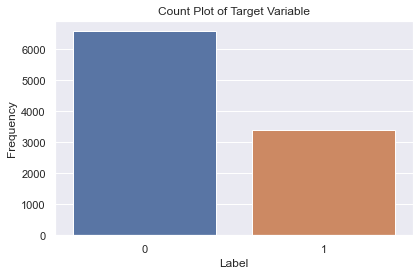

In [44]:
sns.set_theme()
sns.countplot(data = data2, x = "Label")
plt.title("Count Plot of Target Variable")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Results above show that the class distribution for the target variable has been maintained after sampling.

<b>Feature Variables</b>

In [45]:
feat2 = data2.drop("Label", axis = 1)

In [46]:
feat2.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,120.376808,49.369026,81.244245,56.794405,2.374136,18.851385,156.436147,1.436355,-0.136405
std,53.810761,35.066545,40.237491,61.749799,0.779070,21.439426,112.767859,0.848667,1.198702
min,11.839000,0.000000,9.441000,0.012000,0.367000,0.012000,46.698000,0.083000,-1.414000
25%,95.394250,19.385000,59.441000,13.659750,1.814750,2.800250,76.889500,0.882000,-1.374000
50%,112.406000,46.765500,73.757500,37.911500,2.483000,12.034000,118.654500,1.271500,-0.400500
75%,130.666250,73.867500,92.136250,79.053000,2.957000,27.560000,197.733500,1.780000,1.231000
max,937.752000,343.267000,747.370000,611.041000,5.307000,233.659000,984.996000,15.171000,1.414000


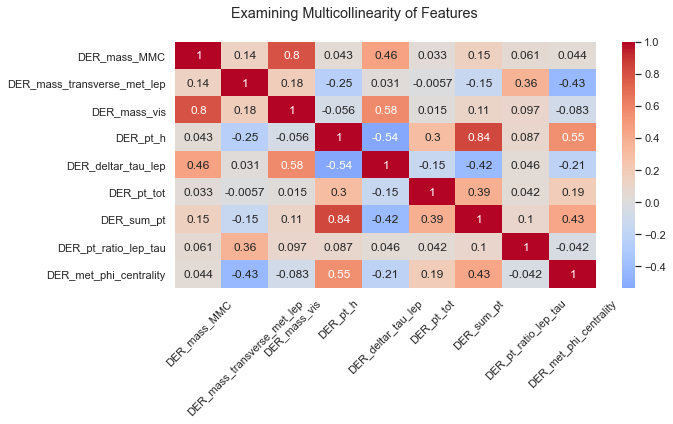

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(feat2.corr(), center = 0, cmap = "coolwarm", annot = True)
plt.suptitle("Examining Multicollinearity of Features")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

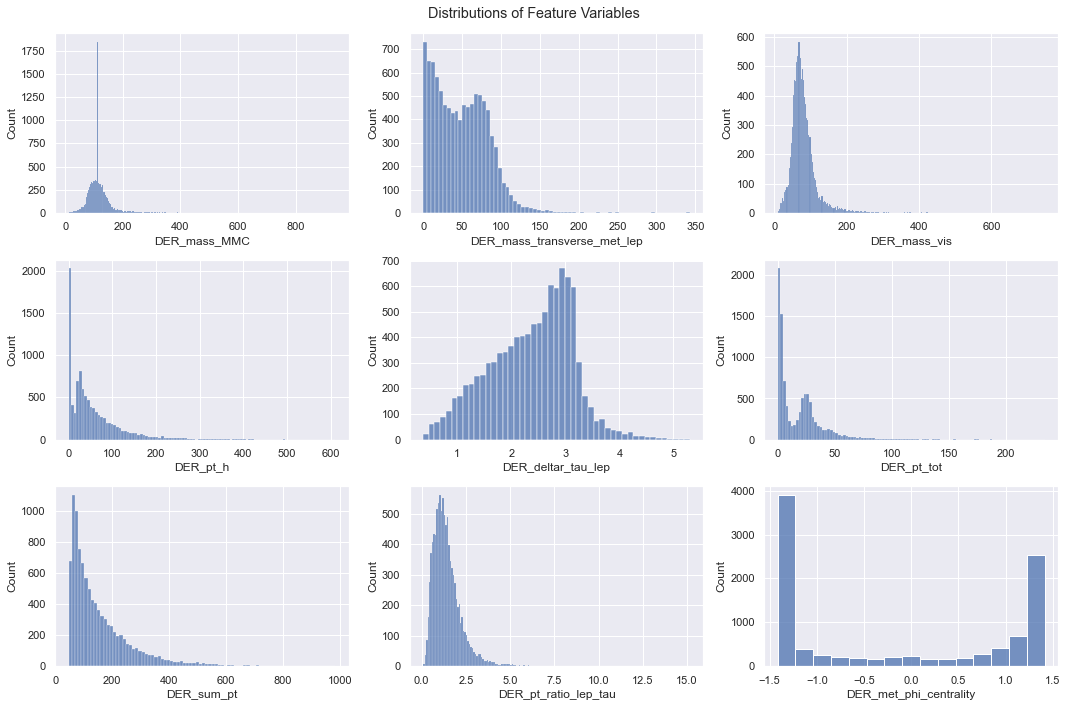

In [48]:
# Examining distributions of features using histograms
num_cols = feat2.shape[1]

fig, axisRows = plt.subplots(3, 3, figsize = (15,10))
i = 0

for axisCols in axisRows:
    
    for axis in axisCols:
        
        if (i < num_cols):
            
            sns.histplot(data = feat2, x = feat2.columns[i], ax = axis)
            i = i + 1
            
plt.suptitle("Distributions of Feature Variables")
plt.tight_layout()
plt.show()

Comparison with earlier visualisations suggest that the underlying distribution of the data has been maintained after random sampling. The data is now ready to be used for building models. 

### Exporting Cleaned Dataset

In [49]:
#data2.to_csv("data_cleaned.csv", index = False)